In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [274]:
color_pallete = ['#A6242F','#181E40','#565759','#1C3659','#F2F2F2']

# Import and prep assessment datasets

### OVERALL ACHIEVEMENT RATE

In [5]:
assesment_district = pd.read_excel("../data/Education 2021_24/Assesment/district_assessment_file_suppressed_2024.xlsx")

In [6]:
assesment_district.head()

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2024,10,Anderson County,EOC,Algebra I,10,All Students,*,10,9,8,*,*,*,*,*,*,*,*,*
1,2024,10,Anderson County,EOC,Algebra I,10,Black or African American,*,1,1,1,*,*,*,*,*,*,*,*,*
2,2024,10,Anderson County,EOC,Algebra I,10,Black/Hispanic/Native American,*,4,3,2,*,*,*,*,*,*,*,*,*
3,2024,10,Anderson County,EOC,Algebra I,10,Economically Disadvantaged,*,3,2,2,*,*,*,*,*,*,*,*,*
4,2024,10,Anderson County,EOC,Algebra I,10,English Learners,*,1,1,0,*,*,*,*,*,*,*,*,*


In [7]:
#assesment_district.drop(['pct_below', 'pct_approaching',
                          ## 'pct_met_exceeded'], axis=1, inplace=True)

In [8]:
assesment_district['participation_rate'] =  pd.to_numeric(assesment_district['participation_rate'], errors = 'coerce')
assesment_district['tested'] =  pd.to_numeric(assesment_district['tested'], errors = 'coerce')
assesment_district['valid_tests'] =  pd.to_numeric(assesment_district['valid_tests'], errors = 'coerce')
assesment_district['n_met_expectations'] =  pd.to_numeric(assesment_district['n_met_expectations'], errors = 'coerce')
assesment_district['n_exceeded_expectations'] =  pd.to_numeric(assesment_district['n_exceeded_expectations'], errors = 'coerce')
assesment_district['pct_met_exceeded'] =  pd.to_numeric(assesment_district['pct_met_exceeded'], errors = 'coerce')


In [10]:
clean = assesment_district[(assesment_district['student_group']== "All Students") & (assesment_district['grade']== "All Grades")]
met_exc = (clean['n_met_expectations'] + clean['n_exceeded_expectations'])
met_exc.sum()/clean['valid_tests'].sum()*100

39.63382639453244

In [11]:
# achievement accross districts
clean['achieved'] = clean['n_exceeded_expectations']+clean['n_met_expectations']
clean_grouped = clean.groupby('system_name').agg(achievement_total = ('achieved', 'sum'),
                                 number_total = ('valid_tests','sum')).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_10880\714750121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['achieved'] = clean['n_exceeded_expectations']+clean['n_met_expectations']


In [12]:
#achievement rate by country
clean_grouped['achievement_ratio'] = round(clean_grouped['achievement_total']*100/clean_grouped['number_total'],2)
clean_grouped.sort_values(by = 'achievement_ratio', ascending = False, inplace = True)
clean_grouped.head()

,system_name,achievement_total,number_total,achievement_ratio
145,Williamson County,62464.0,86777,71.98
27,Collierville,13157.0,19008,69.22
45,Germantown,8065.0,11808,68.30
88,Maryville,7836.0,11676,67.11
5,Arlington,5963.0,9156,65.13


Text(0.5, 1.0, 'Top ten districs by overall achievement rate')

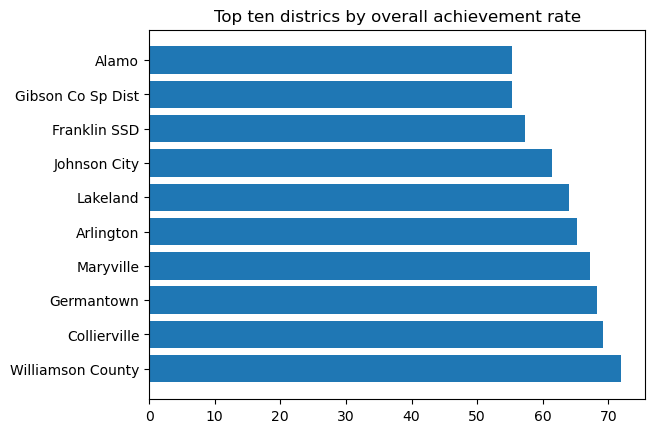

In [13]:
#graph top 10 
large_10 = clean_grouped.nlargest(10, 'achievement_ratio')

plt.barh(large_10['system_name'], large_10['achievement_ratio'])
plt.title("Top ten districs by overall achievement rate")

Text(0.5, 1.0, 'The Bottom 10 districts by overall achievement rate')

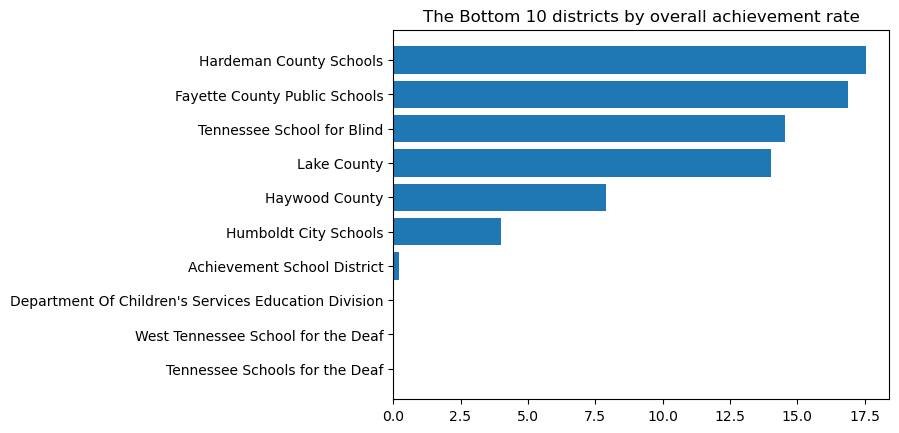

In [14]:
#graph bottom 10 
smallest_10 = clean_grouped.nsmallest(10, 'achievement_ratio')

plt.barh(smallest_10['system_name'], smallest_10['achievement_ratio'])
plt.title("The Bottom 10 districts by overall achievement rate")

### achievement by race

In [16]:
grade = range(3,13)
race = ['Black or African American', 
         'Hispanic',
         'American Indian or Alaska Native', 
         'White', 
         'Native Hawaiian or Other Pacific Islander', 
         'Asian']
         
assesment_race = assesment_district[(assesment_district['student_group'].isin(race)) & (assesment_district['grade']== "All Grades")]
assesment_race.head()

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
72,2024,10,Anderson County,EOC,Algebra I,All Grades,American Indian or Alaska Native,NaN,2,2,2,*,*,NaN,NaN,*,*,*,*,NaN
73,2024,10,Anderson County,EOC,Algebra I,All Grades,Asian,NaN,7,7,6,*,*,NaN,NaN,*,*,*,*,NaN
74,2024,10,Anderson County,EOC,Algebra I,All Grades,Black or African American,100.0,18,18,18,**,**,NaN,NaN,**,**,**,**,33.3
82,2024,10,Anderson County,EOC,Algebra I,All Grades,Hispanic,86.0,21,18,16,**,**,NaN,NaN,**,**,**,**,25.0
85,2024,10,Anderson County,EOC,Algebra I,All Grades,Native Hawaiian or Other Pacific Islander,NaN,2,2,2,*,*,NaN,NaN,*,*,*,*,NaN


In [17]:
assesment_race['achieved'] = assesment_race['n_met_expectations'] + assesment_race['n_exceeded_expectations']
race_groups = (assesment_race.groupby('student_group')
               .agg(valid_tests = ('valid_tests', 'sum'), 
                    achieved_total= ('achieved', 'sum')).reset_index())
race_groups                       

C:\Users\HP\AppData\Local\Temp\ipykernel_10880\1340987554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assesment_race['achieved'] = assesment_race['n_met_expectations'] + assesment_race['n_exceeded_expectations']


,student_group,valid_tests,achieved_total
0,American Indian or Alaska Native,9669,2934.0
1,Asian,52499,33526.0
2,Black or African American,472406,103468.0
3,Hispanic,278546,77438.0
4,Native Hawaiian or Other Pacific Islander,5367,1580.0
5,White,1153826,551323.0


In [18]:
race_groups['achievement_rate'] = round(race_groups['achieved_total']*100/(race_groups['valid_tests']),2)
race_groups.sort_values(by='achievement_rate', ascending = False, inplace = True) 

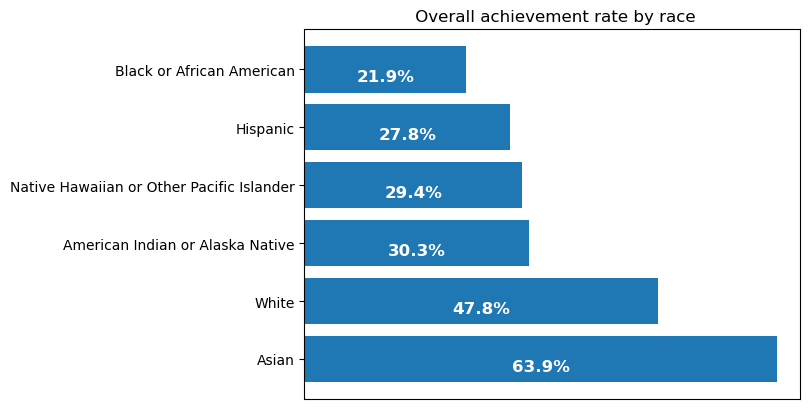

In [19]:

# Create figure and axis
fig, ax = plt.subplots()
# Remove x-axis ticks
ax.set_xticks([])

# Plot bars
bars = ax.barh(race_groups['student_group'],  race_groups['achievement_rate'])

# Annotate each bar with achievement rate
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() /2 ,  # X-position (center of bar)
        bar.get_y() + bar.get_height() / 2,  # Y-position (center of the bar)
        f"{bar.get_width():.1f}%",  # Label text with one decimal place
        ha='center', va='top', fontsize=12, fontweight='bold', color='white'
    )

# Labels and title
plt.title(" Overall achievement rate by race")
plt.show()

### achievement rate by gender

In [21]:
gender = ['Male', 'Female']
clean_gender = (assesment_district[(assesment_district['student_group'].isin(gender)) & 
                                    (assesment_district['grade']== "All Grades")])
clean_gender.head()

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
80,2024,10,Anderson County,EOC,Algebra I,All Grades,Female,97.0,263,256,254,72,103,54.0,25.0,28.3,40.6,21.3,9.8,31.1
84,2024,10,Anderson County,EOC,Algebra I,All Grades,Male,97.0,270,261,260,88,96,58.0,18.0,33.9,36.9,22.3,6.9,29.2
165,2024,10,Anderson County,EOC,Algebra II,All Grades,Female,97.0,236,230,230,34,107,85.0,4.0,14.8,46.5,37,1.7,38.7
169,2024,10,Anderson County,EOC,Algebra II,All Grades,Male,96.0,282,271,267,49,148,66.0,4.0,18.4,55.4,24.7,1.5,26.2
284,2024,10,Anderson County,DLM/Alt-Science/Social Studies,Biology I,All Grades,Female,NaN,3,3,3,*,*,NaN,NaN,*,*,*,*,NaN


In [22]:

clean_gender['achieved'] = clean_gender['n_met_expectations']  + clean_gender['n_exceeded_expectations'] 
geder_grouped = (clean_gender.groupby('student_group')
                 .agg(achieved_total = ('achieved','sum'),
                      tests_total = ('valid_tests', 'sum')).reset_index())
                
geder_grouped                

C:\Users\HP\AppData\Local\Temp\ipykernel_10880\2812868801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_gender['achieved'] = clean_gender['n_met_expectations']  + clean_gender['n_exceeded_expectations']


,student_group,achieved_total,tests_total
0,Female,383600.0,960715
1,Male,395186.0,1011598


In [23]:
geder_grouped['achievement_rate'] = round(geder_grouped['achieved_total']*100/geder_grouped['tests_total'],2)

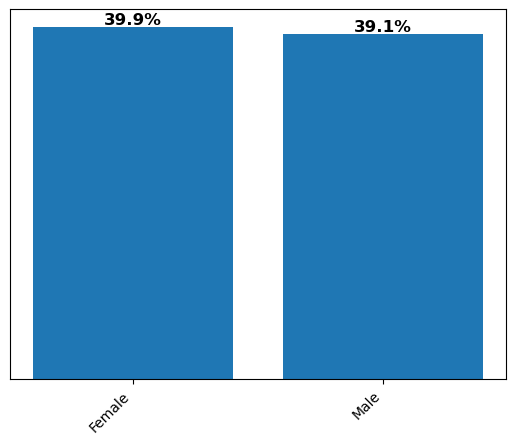

In [24]:

# Create figure and axis
fig, ax = plt.subplots()
ax.set_yticks([])
# Plot bars
bars = ax.bar(geder_grouped['student_group'],  geder_grouped['achievement_rate'])

# Annotate each bar with achievement rate
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-position (center of bar)
        bar.get_height(),  # Y-position (height of the bar)
        f"{bar.get_height():.1f}%",  # Label text with one decimal place
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Labels and title
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [25]:
#PLOT MAP FOR DISTRICTS

## overall student behavior attendance and discipline


### DISTRICT achievement rate vs student behavior 
schatter plot

In [28]:
#import discipline data
dicipline_21 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2020-21-2023-06-05.xlsx', sheet_name ='District' )
dicipline_22 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2021-22-2023-06-05.xlsx',sheet_name ='District')
dicipline_23 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline_district_suppressed_formatted_2022-23.xlsx',sheet_name ='District')
dicipline_24 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline-district-2324.xlsx',sheet_name ='District')

In [29]:
dicipline_21.columns

Index(['School Year', 'District', 'District Name', 'Students Iss',
       'Students Suspended', 'Students Expelled',
       'Students Transferred To Alternative School',
       'Students Committed Zero Tolerance', 'Disciplined Total', 'Percent Iss',
       'Percent Suspended', 'Percent Expelled',
       'Percent Transferred To Alternative School',
       'Percent Committed Zero Tolerance', 'Percent Disciplined'],
      dtype='object')

In [32]:
#clean School year and create year column
dicipline_21['year']=  '20'+dicipline_21['School Year'].str[-2:]
dicipline_22['year']=  '20'+dicipline_22['School Year'].str[-2:]
dicipline_23['year']=  '20'+dicipline_23['School Year'].str[-2:]
dicipline_24['year']=  '20'+dicipline_24['School Year'].str[-2:]
#subset the datasets for the required columns
dicipline_21 = dicipline_21[['year', 'District Name', 'Percent Disciplined']]
dicipline_22 = dicipline_22[['year', 'District Name', 'Percent Disciplined']]
dicipline_23 = dicipline_23[['year', 'District Name', 'Percent Disciplined']]
dicipline_24 = dicipline_24[['year', 'District Name', 'Percent Disciplined']]
#combine the data sets
discipline = pd.concat([dicipline_21,dicipline_22,dicipline_23,dicipline_24])

discipline.head()

,year,District Name,Percent Disciplined
0,2021,State of Tennessee,3.9
1,2021,Anderson County,7.2
2,2021,Clinton,-10.0
3,2021,Oak Ridge,8.4
4,2021,Bedford County,5.7


In [33]:
#data conversion
discipline['Percent Disciplined'] = pd.to_numeric(discipline['Percent Disciplined'], errors = 'coerce')
# group for districts
discipline_districts = discipline.groupby(['year','District Name'])['Percent Disciplined'].mean().reset_index()
discipline_districts.tail()

,year,District Name,Percent Disciplined
591,2024,West Carroll Sp Dist,2.2
592,2024,West Tennessee School for the Deaf,NaN
593,2024,White County,10.8
594,2024,Williamson County,5.4
595,2024,Wilson County,11.0


In [34]:
len(discipline_districts[discipline_districts['Percent Disciplined'] <0])

34

In [35]:
#subset the data to filter for suspension rules
discipline_clean = discipline_districts[discipline_districts['Percent Disciplined'] >= 0]

In [36]:
#state wide percent _ disciplined
discipline_state_year = discipline_clean.groupby('year')['Percent Disciplined'].mean().reset_index()
discipline_state_year

,year,Percent Disciplined
0,2021,4.775781
1,2022,8.304412
2,2023,8.223134
3,2024,8.870896


In [37]:
#discipline across districts
avg_district_dicipline = (discipline_clean.groupby(['year','District Name'])['Percent Disciplined']
                          .mean().reset_index())
avg_district_dicipline

,year,District Name,Percent Disciplined
0,2021,Achievement School District,1.0
1,2021,Alcoa,2.0
2,2021,Anderson County,7.2
3,2021,Arlington,1.7
4,2021,Athens,1.8
...,...,...,...
527,2024,Weakley County,3.2
528,2024,West Carroll Sp Dist,2.2
529,2024,White County,10.8
530,2024,Williamson County,5.4


In [38]:
#import absenteeism data
absenteeism_21 = pd.read_csv('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_20-21.csv')
absenteeism_22 = pd.read_excel('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_21-22.xlsx')
absenteeism_23 = pd.read_excel('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_2023.xlsx')
absenteeism_24 = pd.read_excel('../data/Education 2021_24/Chronic Absenteeism/District_level/district_chronic_absenteeism_suppressed_2024.xlsx')
#check shape
print(absenteeism_21.shape)
print(absenteeism_22.shape)
print(absenteeism_23.shape)
print(absenteeism_24.shape)

(4416, 7)
(4444, 7)
(4479, 7)
(5341, 7)


In [39]:
absenteeism_21.columns

Index(['system', 'system_name', 'subgroup', 'grade_band', 'n_students',
       'n_chronically_absent', 'pct_chronically_absent'],
      dtype='object')

In [40]:
#rename columns
absenteeism_21 = absenteeism_21.rename(columns = {'subgroup':'student_group'})

In [41]:
#add year column
absenteeism_21['year'] = '2021'
absenteeism_22['year'] = '2022'
absenteeism_23['year'] = '2023'
absenteeism_24['year'] = '2024'


In [42]:
#subset the data for usable columns
absenteeism_21 = absenteeism_21[['year','system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
absenteeism_22 = absenteeism_22[['year','system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
absenteeism_23 = absenteeism_23[['year', 'system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
absenteeism_24 = absenteeism_24[['year', 'system', 'system_name', 'student_group', 'grade_band','pct_chronically_absent']]
# combine the dataset 
absenteeism = pd.concat([absenteeism_21,absenteeism_22,absenteeism_23,absenteeism_24],ignore_index = True)


In [43]:
#convert columns to numeric
absenteeism['pct_chronically_absent'] = pd.to_numeric(absenteeism['pct_chronically_absent'] , errors= 'coerce')
#remove negative entries
absenteeism = absenteeism[absenteeism['pct_chronically_absent'] >=0]

In [44]:
#group the data for districts
absenteeism_district_year = (absenteeism[(absenteeism['student_group'] == 'All Students') &
                                        (absenteeism['grade_band'] == 'All Grades')]
                             .groupby(['year','system_name'])['pct_chronically_absent']
                             .mean()
                            
                            ).reset_index()
absenteeism_district_year


,year,system_name,pct_chronically_absent
0,2021,Achievement School District,49.3
1,2021,Alamo,3.2
2,2021,Alcoa,9.1
3,2021,Alvin C York Institute,23.4
4,2021,Anderson County,17.6
...,...,...,...
576,2024,West Carroll Sp Dist,16.4
577,2024,West Tennessee School for the Deaf,12.0
578,2024,White County,12.4
579,2024,Williamson County,7.5


In [45]:
#merge achievement data 
district_absent_2024 = clean_grouped.merge(absenteeism_district_year[absenteeism_district_year['year'] == '2024'],
                            on = 'system_name',
                            how = 'left'
                               )

district_absent_2024.head()

,system_name,achievement_total,number_total,achievement_ratio,year,pct_chronically_absent
0,Williamson County,62464.0,86777,71.98,2024,7.5
1,Collierville,13157.0,19008,69.22,2024,10.2
2,Germantown,8065.0,11808,68.30,2024,6.8
3,Maryville,7836.0,11676,67.11,2024,8.0
4,Arlington,5963.0,9156,65.13,2024,6.9


Text(0.5, 1.0, 'Achievement rate Vs pct pct_chronically_absent')

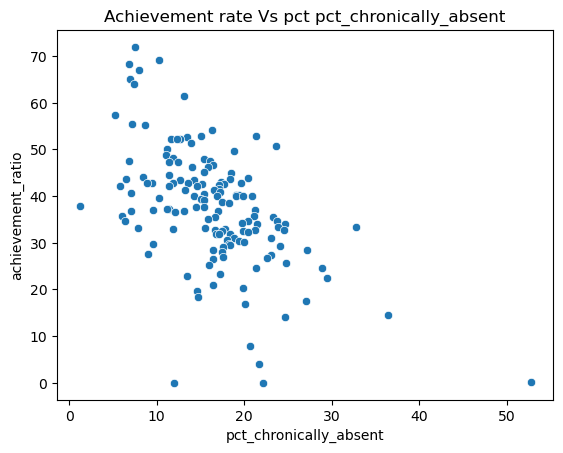

In [46]:
#plot scatter plot
sns.scatterplot(data = district_absent_2024, x = 'pct_chronically_absent', y='achievement_ratio' )
plt.title('Achievement rate Vs pct pct_chronically_absent')

In [47]:
absenteeism_district_year.head()

,year,system_name,pct_chronically_absent
0,2021,Achievement School District,49.3
1,2021,Alamo,3.2
2,2021,Alcoa,9.1
3,2021,Alvin C York Institute,23.4
4,2021,Anderson County,17.6


In [48]:
#district discipline vs achievement
district_dicipline_2024 = avg_district_dicipline[avg_district_dicipline['year']=='2024'].merge(district_absent_2024,
                                                                    left_on = ('year','District Name'),
                                                                    right_on = ('year','system_name'),
                                                                    how='right')
district_behavior_2024 = district_dicipline_2024[['year','District Name','achievement_ratio','Percent Disciplined','pct_chronically_absent']]
district_behavior_2024.head()

,year,District Name,achievement_ratio,Percent Disciplined,pct_chronically_absent
0,2024,Williamson County,71.98,5.4,7.5
1,2024,Collierville,69.22,2.8,10.2
2,2024,Germantown,68.30,4.3,6.8
3,2024,Maryville,67.11,4.0,8.0
4,2024,Arlington,65.13,7.4,6.9


Text(0.5, 1.0, 'Achievement rate by pct of students disciplined (2024)')

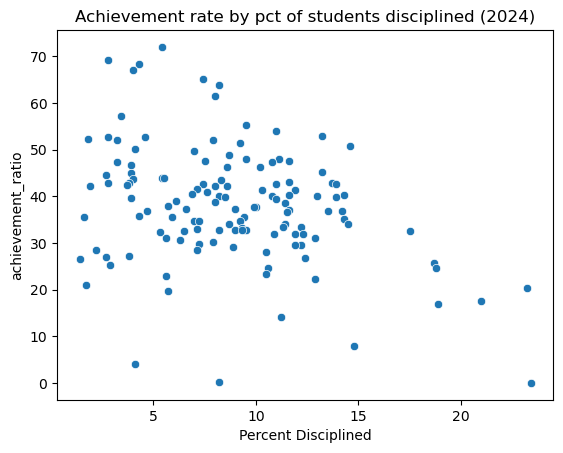

In [49]:
#scatter plot
sns.scatterplot(data = district_behavior_2024, x = 'Percent Disciplined', y = 'achievement_ratio')
plt.title('Achievement rate by pct of students disciplined (2024)')

In [50]:
# calculate avg pct absent for year groups
absenteeism_state_year = (absenteeism[(absenteeism['student_group'] == 'All Students') & 
                     (absenteeism['grade_band'] == 'All Grades')]
                     .groupby('year')['pct_chronically_absent'].mean().reset_index()
                         )
absenteeism_state_year

,year,pct_chronically_absent
0,2021,13.730137
1,2022,18.128276
2,2023,17.872414
3,2024,16.341379


In [51]:
#combine discipline and absenteeism data
student_behavior = discipline_state_year.merge(absenteeism_state_year,
                                          on = 'year',
                                          how = 'inner')
student_behavior

,year,Percent Disciplined,pct_chronically_absent
0,2021,4.775781,13.730137
1,2022,8.304412,18.128276
2,2023,8.223134,17.872414
3,2024,8.870896,16.341379


In [52]:
#calculate year - year achievement and plot line graph for the 3 metrix

In [53]:
#group districts in to four quartiles by achievement rate and plot grouped bar graph to compare 
#achievement rate VS discipline VS absenteeim

### student behavior across student groups (race and gender

#### gender Vs achievement rate

In [56]:
#gender absenteeism

absenteeism_gender = (absenteeism[(absenteeism['student_group'].isin(gender)) & 
                     (absenteeism['grade_band'] != 'All Grades')]
                     .groupby(['year','student_group'])['pct_chronically_absent']
                      .mean().reset_index()
                         )
absenteeism_gender.set_index('student_group', inplace = True)
absenteeism_gender


,year,pct_chronically_absent
student_group,,
Female,2024,18.214706
Male,2024,17.315018


In [57]:
#import gender discipline data
dicipline_gender_21 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2020-21-2023-06-05.xlsx', sheet_name ='gender' )
dicipline_gender_22 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2021-22-2023-06-05.xlsx',sheet_name ='gender')
dicipline_gender_23 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline_district_suppressed_formatted_2022-23.xlsx',sheet_name ='gender')
dicipline_gender_24 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline-district-2324.xlsx',sheet_name ='gender')
#introduce year column
dicipline_gender_21['year'] = '20'+dicipline_gender_21['School Year'].str[-2:]
dicipline_gender_22['year'] = '20'+dicipline_gender_22['School Year'].str[-2:]
dicipline_gender_23['year'] = '20'+dicipline_gender_23['School Year'].str[-2:]
dicipline_gender_24['year'] = '20'+dicipline_gender_24['School Year'].str[-2:]

#subset the datasets for required columns
dicipline_gender_21 = dicipline_gender_21[['year','District', 'District Name', 'Gender','Percent Disciplined']]
dicipline_gender_22 = dicipline_gender_22[['year','District', 'District Name', 'Gender','Percent Disciplined']]
dicipline_gender__23 = dicipline_gender_23[['year','District', 'District Name', 'Gender','Percent Disciplined']]
dicipline_gender_24 = dicipline_gender_24[['year','District', 'District Name', 'Gender','Percent Disciplined']]

#combine the dataset
dicipline_gender = pd.concat([dicipline_gender_21,dicipline_gender_22,dicipline_gender__23, dicipline_gender_24], ignore_index = True)

#convert data
dicipline_gender['Percent Disciplined'] = pd.to_numeric(dicipline_gender['Percent Disciplined'], errors = 'coerce')
#clean for suppressed values
dicipline_gender = dicipline_gender[dicipline_gender['Percent Disciplined'] >= 0]
dicipline_gender[dicipline_gender['year']=='2024']

,year,District,District Name,Gender,Percent Disciplined
902,2024,0,State of Tennessee,Male,12.7
904,2024,10,Anderson County,Female,7.1
905,2024,10,Anderson County,Male,12.7
908,2024,12,Oak Ridge,Female,9.1
909,2024,12,Oak Ridge,Male,17.3
...,...,...,...,...,...
1194,2024,964,Tennessee Schools for the Deaf,Male,27.3
1197,2024,985,Achievement School District,Female,7.8
1198,2024,985,Achievement School District,Male,8.6
1199,2024,987,Tennessee Public Charter School Commission,Female,4.7


In [58]:
#aggregate the data for state level and gender group
dicipline_gender_24 = dicipline_gender[dicipline_gender['year'] == '2024']
state_gender_dicipline = (dicipline_gender_24[dicipline_gender_24['District Name'] != 'State of Tennessee']
                          .groupby('Gender')['Percent Disciplined'].mean().reset_index()
                         )
state_gender_dicipline.set_index('Gender', inplace=True)

In [59]:
state_gender_dicipline


,Percent Disciplined
Gender,
Female,5.968852
Male,12.435772


In [60]:
geder_grouped.set_index('student_group',inplace = True)

In [61]:
achivement_gender_behavior = pd.concat([state_gender_dicipline,geder_grouped,absenteeism_gender], axis = 1)
achivement_gender_behavior

,Percent Disciplined,achieved_total,tests_total,achievement_rate,year,pct_chronically_absent
Female,5.968852,383600.0,960715,39.93,2024,18.214706
Male,12.435772,395186.0,1011598,39.07,2024,17.315018


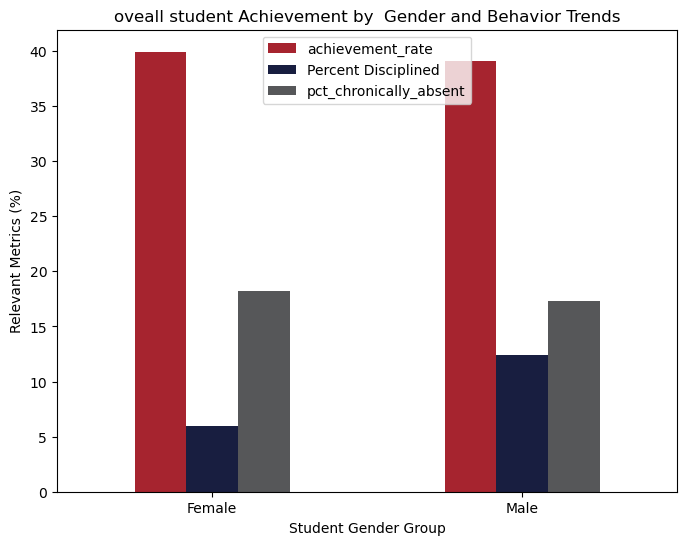

In [256]:
data = achivement_gender_behavior[['achievement_rate','Percent Disciplined','pct_chronically_absent']]

ax = data.plot(
    kind='bar', figsize=(8, 6), color=color_pallete
)

plt.xlabel('Student Gender Group')                            
plt.ylabel('Relevant Metrics (%)')  
plt.title('oveall student Achievement by  Gender and Behavior Trends')

# xticks display
plt.xticks(rotation= 'horizontal')

plt.legend( loc = 'upper center')

# Save and show the plot
#plt.savefig('../data/hdwy_pct_range.jpg', dpi=600)
plt.show()

#### race Vs achiement rate

In [64]:
#race group absenteeism
absenteeism_race = (absenteeism[(absenteeism['student_group'].isin(race)) & 
                     (absenteeism['grade_band'] != 'All Grades')]
                     .groupby(['year','student_group'])['pct_chronically_absent']
                    .mean().reset_index()
                         )
absenteeism_race

,year,student_group,pct_chronically_absent
0,2021,American Indian or Alaska Native,16.308642
1,2021,Asian,6.901000
2,2021,Black or African American,19.250410
3,2021,Hispanic,15.554585
4,2021,Native Hawaiian or Other Pacific Islander,15.397368
5,2021,White,13.769517
6,2022,American Indian or Alaska Native,21.365263
7,2022,Asian,8.538889
8,2022,Black or African American,22.823790
9,2022,Hispanic,19.197925


In [65]:
race_names = {
    'American Indian or Alaska Native': 'Native American/Alaskan',
    'Hispanic or Latino': 'Hispanic',
    'Native Hawaiian or Other Pacific Islander': 'Native Hawaiian/Pacific Islander'  # Removed extra space
}

def rename_race(row):
    return race_names.get(row, row)  # Using .get() avoids errors if row is not in race_names


In [66]:
absenteeism_race['student_group'] = absenteeism_race['student_group'].apply(rename_race)

In [67]:
#dicipline by student group
#import discipline by race data
dicipline_race_21 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2020-21-2023-06-05.xlsx', sheet_name ='Race-Ethnicity' )
dicipline_race_22 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/district-discipline-2021-22-2023-06-05.xlsx',sheet_name ='Race-Ethnicity')
dicipline_race_23 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline_district_suppressed_formatted_2022-23.xlsx',sheet_name ='Race-Ethnicity')
dicipline_race_24 = pd.read_excel('../data/Education 2021_24/Discipline/District_level/discipline-district-2324.xlsx',sheet_name ='Race-Ethnicity')

In [68]:
#add year column
dicipline_race_21['year'] = '20'+ dicipline_race_21['School Year'].str[-2:]
dicipline_race_22['year'] = '20'+ dicipline_race_22['School Year'].str[-2:]
dicipline_race_23['year'] = '20'+ dicipline_race_22['School Year'].str[-2:]
dicipline_race_24['year'] = '20'+ dicipline_race_24['School Year'].str[-2:]

In [69]:
#subset for required fields
dicipline_race_21 = dicipline_race_21[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
dicipline_race_22 = dicipline_race_22[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
dicipline_race_23 = dicipline_race_22[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
dicipline_race_24 = dicipline_race_24[['year','District Name', 'Race or Ethnicity','Percent Disciplined']]
#combine the datasets
dicipline_race = pd.concat([dicipline_race_21,dicipline_race_22,dicipline_race_23,dicipline_race_24], ignore_index = True)
dicipline_race.head()

,year,District Name,Race or Ethnicity,Percent Disciplined
0,2021,State of Tennessee,Asian,1.0
1,2021,State of Tennessee,Black or African American,4.0
2,2021,State of Tennessee,Hispanic or Latino,3.0
3,2021,State of Tennessee,Native American/Alaskan,4.0
4,2021,State of Tennessee,Native Hawaiian/Pacific Islander,3.4


In [70]:
#standardize student group column
dicipline_race['Race or Ethnicity'] = dicipline_race['Race or Ethnicity'].apply(rename_race)

In [71]:
#data type conversion
dicipline_race['Percent Disciplined'] = pd.to_numeric(dicipline_race['Percent Disciplined'], errors = 'coerce')

In [72]:
# state percent diciplined by race
state_diciplined_byrace = (dicipline_race[dicipline_race['District Name'] == 'State of Tennessee']
                           .groupby(['year','Race or Ethnicity'])['Percent Disciplined']
                           .mean().reset_index()
                          )
state_diciplined_byrace.head()

,year,Race or Ethnicity,Percent Disciplined
0,2021,Asian,1.0
1,2021,Black or African American,4.0
2,2021,Hispanic,3.0
3,2021,Native American/Alaskan,4.0
4,2021,Native Hawaiian/Pacific Islander,3.4


In [73]:
#rename column for consistency
state_diciplined_byrace = state_diciplined_byrace.rename(columns = {'Race or Ethnicity':'student_group'})
state_diciplined_byrace['student_group'].unique()

array(['Asian', 'Black or African American', 'Hispanic',
       'Native American/Alaskan', 'Native Hawaiian/Pacific Islander',
       'White'], dtype=object)

In [74]:
absenteeism_race['student_group'].unique()

array(['Native American/Alaskan', 'Asian', 'Black or African American',
       'Hispanic', 'Native Hawaiian/Pacific Islander', 'White'],
      dtype=object)

In [75]:
#combine student-behavior df
student_behavior_race = absenteeism_race.merge(state_diciplined_byrace, 
                                              on = ('year', 'student_group'),
                                              how = 'inner')
student_behavior_race.head()

,year,student_group,pct_chronically_absent,Percent Disciplined
0,2021,Native American/Alaskan,16.308642,4.0
1,2021,Asian,6.901000,1.0
2,2021,Black or African American,19.250410,4.0
3,2021,Hispanic,15.554585,3.0
4,2021,Native Hawaiian/Pacific Islander,15.397368,3.4


In [76]:
#subset studet behavior for 2024
student_race_2024 =  student_behavior_race[student_behavior_race['year'] == '2024']
student_race_2024

,year,student_group,pct_chronically_absent,Percent Disciplined
12,2024,Native American/Alaskan,22.207619,9.6
13,2024,Asian,8.565414,3.3
14,2024,Black or African American,20.591968,16.4
15,2024,Hispanic,16.348988,8.1
16,2024,Native Hawaiian/Pacific Islander,20.455556,7.7
17,2024,White,17.199632,7.8


In [77]:
#combine student behavior data with overall achievement rate
#standardize race groups
race_groups['student_group'] = race_groups['student_group'].apply(rename_race)
#merge the data
overall_achivement_behavior = (student_race_2024.merge(race_groups,
                                                      on = 'student_group',
                                                      how = "inner").reset_index()
                               .sort_values(by = 'achievement_rate', ascending = False))
overall_achivement_behavior

,index,year,student_group,pct_chronically_absent,Percent Disciplined,valid_tests,achieved_total,achievement_rate
1,1,2024,Asian,8.565414,3.3,52499,33526.0,63.86
5,5,2024,White,17.199632,7.8,1153826,551323.0,47.78
0,0,2024,Native American/Alaskan,22.207619,9.6,9669,2934.0,30.34
4,4,2024,Native Hawaiian/Pacific Islander,20.455556,7.7,5367,1580.0,29.44
3,3,2024,Hispanic,16.348988,8.1,278546,77438.0,27.80
2,2,2024,Black or African American,20.591968,16.4,472406,103468.0,21.90


In [78]:
# set 'student_group' as index 
overall_achivement_behavior.set_index('student_group', inplace=True)

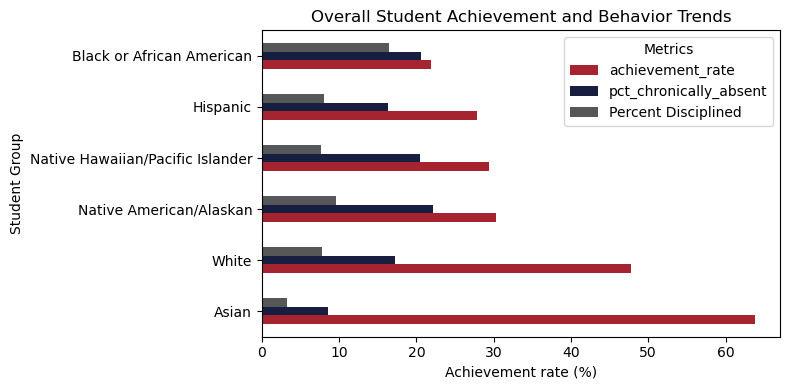

In [79]:

ax = overall_achivement_behavior[[ 'achievement_rate', 'pct_chronically_absent', 'Percent Disciplined']].plot(
    kind='barh', figsize=(8, 4), color=color_pallete
)

plt.xlabel('Achievement rate (%)')  # Adjusted for clarity
plt.ylabel('Student Group')
plt.title('Overall Student Achievement and Behavior Trends')

# Ensure correct yticks display
#plt.yticks(ticks=range(len(overall_achivement_behavior.index)), labels=overall_achivement_behavior.index)

plt.legend(title='Metrics')
plt.tight_layout()
# Save and show the plot
#plt.savefig('../data/hdwy_pct_range.jpg', dpi=600)
plt.show()

## school staff vs achievement rate

#### student to staff ratio

In [82]:
#import data
student_staff_24 = pd.read_excel('../data/Education 2021_24/Educators/Educator Count/staff-2023-24-final.xlsx')
student_staff_23 = pd.read_excel('../data/Education 2021_24/Educators/Educator Count/staff-2022-23-final.xlsx')
student_staff_22 = pd.read_excel('../data/Education 2021_24/Educators/Educator Count/staff-2021-2022-updated-2023-01-06.xlsx')
student_staff_21 = pd.read_excel('../data/Education 2021_24/Educators/Educator Count/staff-2020-2021-updated-2023-01-06.xlsx')

#clean Year column
student_staff_24['Year'] = student_staff_24['Year'].str[-4:]
student_staff_23['Year'] = student_staff_23['Year'].str[-4:]
student_staff_22['Year'] = student_staff_22['Year'].str[-4:]
student_staff_21['Year'] = student_staff_21['Year'].str[-4:]

#merge the datsets
student_staff = pd.concat([student_staff_24,student_staff_23,student_staff_22,student_staff_21], ignore_index = True)
student_staff.head()

,Year,System Number,System Name,School Number,School Name,Staff Type,Educator Count,Student-Educator Ratio
0,2024,0,State of Tennessee,0,All Schools,Administrator,4134,235.0
1,2024,0,State of Tennessee,0,All Schools,Other Staff,13913,70.0
2,2024,0,State of Tennessee,0,All Schools,Teacher,58811,17.0
3,2024,10,Anderson County,0,All Schools,Administrator,33,178.0
4,2024,10,Anderson County,0,All Schools,Other Staff,110,53.0


In [83]:
#check size
print(student_staff_24.size)
print(student_staff_23.size)
print(student_staff_22.size)
print(student_staff_21.size)
print(student_staff.size)

45416
45440
45440
45152
181448


In [84]:
student_staff['Staff Type'].unique()

array(['Administrator', 'Other Staff', 'Teacher'], dtype=object)

In [85]:
#subset the data for districts + all schools
student_teacher = (student_staff[(student_staff['System Name']!= 'State of Tennessee') &
                    (student_staff['Staff Type']== 'Teacher')]
                  )
student_teacher_ratio = student_teacher[(student_teacher['School Name'] == 'All Schools') & (student_teacher['Year']=='2024')]
avg_student_teacher_2024 = student_teacher_ratio.groupby(['System Number', 'System Name'])['Student-Educator Ratio'].mean().reset_index()
avg_student_teacher_2024.head()

,System Number,System Name,Student-Educator Ratio
0,10,Anderson County,14.0
1,11,Clinton,16.0
2,12,Oak Ridge,14.0
3,20,Bedford County,18.0
4,30,Benton County,14.0


In [86]:
#merge with district achievement rate dataset
district_behavior_stratio = district_behavior_2024.merge(avg_student_teacher_2024,
                             left_on = 'District Name',
                             right_on =  'System Name',
                             how = 'left')
district_behavior_stratio.head()

,year,District Name,achievement_ratio,Percent Disciplined,pct_chronically_absent,System Number,System Name,Student-Educator Ratio
0,2024,Williamson County,71.98,5.4,7.5,940.0,Williamson County,17.0
1,2024,Collierville,69.22,2.8,10.2,795.0,Collierville,16.0
2,2024,Germantown,68.30,4.3,6.8,796.0,Germantown,17.0
3,2024,Maryville,67.11,4.0,8.0,52.0,Maryville,17.0
4,2024,Arlington,65.13,7.4,6.9,793.0,Arlington,18.0


In [87]:
district_behavior_stratio[district_behavior_stratio['Student-Educator Ratio'] == district_behavior_stratio['Student-Educator Ratio'].max()]

,year,District Name,achievement_ratio,Percent Disciplined,pct_chronically_absent,System Number,System Name,Student-Educator Ratio
127,2024,Johnson County,25.18,2.9,16.0,460.0,Johnson County,35.0


Text(0.5, 0, 'student_teacher_ratio')

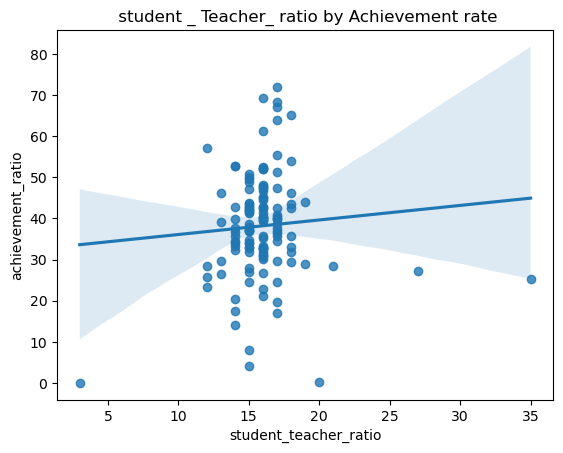

In [88]:
sns.regplot(data = district_behavior_stratio, x = 'Student-Educator Ratio', y = 'achievement_ratio')
plt.title(" student _ Teacher_ ratio by Achievement rate")
plt.xlabel("student_teacher_ratio")

#### Teachers experience

In [90]:
#import data
teacher_exp_24 = pd.read_excel('../data/Education 2021_24/Educators/Educator Experience and Licensure Data/EducatorExperienceandLicensureData2024.xlsx', sheet_name ='experience')
teacher_exp_23 = pd.read_excel('../data/Education 2021_24/Educators/Educator Experience and Licensure Data/EducatorExperienceandLicensureData2023.xlsx', sheet_name ='experience')
teacher_exp_22 = pd.read_excel('../data/Education 2021_24/Educators/Educator Experience and Licensure Data/EducatorExperienceandLicensureData2022.xlsx', sheet_name ='experience')
teacher_exp_21 = pd.read_excel('../data/Education 2021_24/Educators/Educator Experience and Licensure Data/EducatorExperienceandLicensureData2021.xlsx', sheet_name ='experience')

#clean Year column
teacher_exp_24['Year'] = 2024
teacher_exp_23['Year'] = 2023
teacher_exp_22['Year'] = 2022
teacher_exp_21['Year'] = 2021

#standardize the percentage column
teacher_exp_24['Percentage'] = teacher_exp_24['Percentage']*100

#merge the datsets
teacher_exp = pd.concat([teacher_exp_24,teacher_exp_23,teacher_exp_22,teacher_exp_21], ignore_index = True)
teacher_exp.head()

,DistrictNumber,DistrictName,SchoolNumber,SchoolName,Category,Number,Percentage,Year
0,10,Anderson County,2.0,Anderson County High School,Experienced Administrators,5,100.0,2024
1,10,Anderson County,2.0,Anderson County High School,Experienced School Service Personnel,5,83.33,2024
2,10,Anderson County,2.0,Anderson County High School,Experienced Teachers,40,80.0,2024
3,10,Anderson County,2.0,Anderson County High School,Inexperienced Administrators,0,0.0,2024
4,10,Anderson County,2.0,Anderson County High School,Inexperienced School Service Personnel,1,16.67,2024


In [91]:
#clean percentage column conversion
teacher_exp['Percentage'] = teacher_exp['Percentage'].astype(str).str.extract(r'(\d+)')
teacher_exp['Percentage'] = pd.to_numeric(teacher_exp['Percentage'])
# group the Experienced Teachers  catagory at district
teacher_exp_dist = (teacher_exp[teacher_exp['Category']== 'Experienced Teachers']
                    .groupby(['Year', 'DistrictNumber','DistrictName'])['Percentage']
                    .mean().reset_index()
                   )
teacher_exp_dist[teacher_exp_dist['Year'] == 2024]

,Year,DistrictNumber,DistrictName,Percentage
444,2024,10,Anderson County,79.944444
445,2024,11,Clinton,82.000000
446,2024,12,Oak Ridge,92.142857
447,2024,20,Bedford County,78.714286
448,2024,30,Benton County,81.000000
...,...,...,...,...
584,2024,951,Lebanon,90.285714
585,2024,960,West Tennessee School for the Deaf,50.000000
586,2024,964,Tennessee Schools for the Deaf,26.333333
587,2024,985,Achievement School District,62.384615


In [92]:
#merge the data to the main data set
district_behavior_st_tex = (
    (district_behavior_stratio[['year','System Number','District Name','achievement_ratio',
                            'Percent Disciplined','pct_chronically_absent','Student-Educator Ratio']])
    .merge(teacher_exp_dist[teacher_exp_dist['Year'] == 2024],
            left_on = 'District Name',
           right_on = 'DistrictName',
           how = 'left')
)
district_behavior_st_tex.head()

,year,System Number,District Name,achievement_ratio,Percent Disciplined,pct_chronically_absent,Student-Educator Ratio,Year,DistrictNumber,DistrictName,Percentage
0,2024,940.0,Williamson County,71.98,5.4,7.5,17.0,2024.0,940.0,Williamson County,77.730769
1,2024,795.0,Collierville,69.22,2.8,10.2,16.0,2024.0,795.0,Collierville,80.900000
2,2024,796.0,Germantown,68.30,4.3,6.8,17.0,2024.0,796.0,Germantown,77.285714
3,2024,52.0,Maryville,67.11,4.0,8.0,17.0,2024.0,52.0,Maryville,79.375000
4,2024,793.0,Arlington,65.13,7.4,6.9,18.0,2024.0,793.0,Arlington,93.000000


In [93]:
district_behavior_st_tex = district_behavior_st_tex.drop(columns=['DistrictNumber', 'DistrictName','Year'])

Text(0.5, 1.0, '% of Experienced Teachers by Achievement ratio')

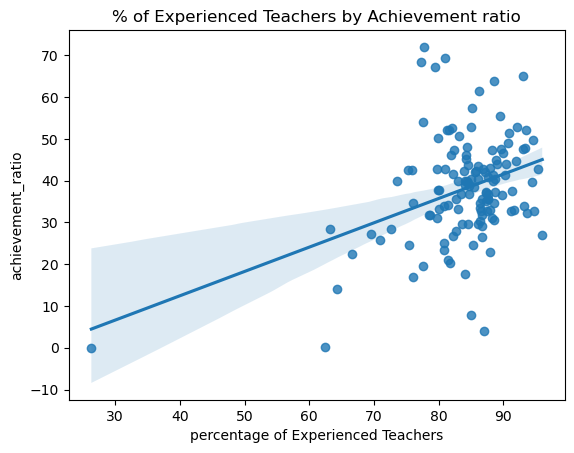

In [94]:
sns.regplot(data = district_behavior_st_tex, x = 'Percentage', y = 'achievement_ratio')
plt.xlabel("percentage of Experienced Teachers")
plt.title("% of Experienced Teachers by Achievement ratio")

#### staff Income

In [96]:
# import dataset
staff_poverty_2024 = pd.read_excel('../data/Education 2021_24/Educators/Educator Experience and Licensure Data/EducatorExperienceandLicensureData2024.xlsx', sheet_name='poverty')

In [97]:
#subset the data for experienced Teachet
teachers_poverty_2024 = (staff_poverty_2024[(staff_poverty_2024['Category'] == 'Experienced Teachers') & 
                         (staff_poverty_2024['Poverty'] == 'All')]
                        )
teachers_poverty_2024 = teachers_poverty_2024.rename(columns = {'Percentage':'Pect poverty'})
teachers_poverty_2024.head()

,DistrictNumber,DistrictName,Category,Poverty,Number,Pect poverty
2,10,Anderson County,Experienced Teachers,All,322,80.10%
41,11,Clinton,Experienced Teachers,All,51,86.44%
80,12,Oak Ridge,Experienced Teachers,All,297,93.69%
106,20,Bedford County,Experienced Teachers,All,391,78.67%
145,30,Benton County,Experienced Teachers,All,122,84.14%


In [98]:
#clean Percentage column
teachers_poverty_2024['Pect poverty'] = teachers_poverty_2024['Pect poverty'].astype(str).str.extract(r'(\d+)').astype(float)


In [99]:
 teachers_poverty_2024.drop(columns = ['Category','Poverty','Number','DistrictNumber'], inplace = True)

In [100]:
#set_index
teachers_poverty_2024.set_index('DistrictName', inplace = True)
district_behavior_st_tex.set_index('District Name', inplace = True)

In [101]:
#merge with main data set
district_main_poverty = district_behavior_st_tex.merge(teachers_poverty_2024, left_index=True, right_index=True, how = 'left')
district_main_poverty.head()

,year,System Number,achievement_ratio,Percent Disciplined,pct_chronically_absent,Student-Educator Ratio,Percentage,Pect poverty
District Name,,,,,,,,
Williamson County,2024,940.0,71.98,5.4,7.5,17.0,77.730769,78.0
Collierville,2024,795.0,69.22,2.8,10.2,16.0,80.900000,90.0
Germantown,2024,796.0,68.30,4.3,6.8,17.0,77.285714,90.0
Maryville,2024,52.0,67.11,4.0,8.0,17.0,79.375000,91.0
Arlington,2024,793.0,65.13,7.4,6.9,18.0,93.000000,93.0


Text(0.5, 1.0, 'Experienced Teachers poverty Pct Vs Achievement_rate')

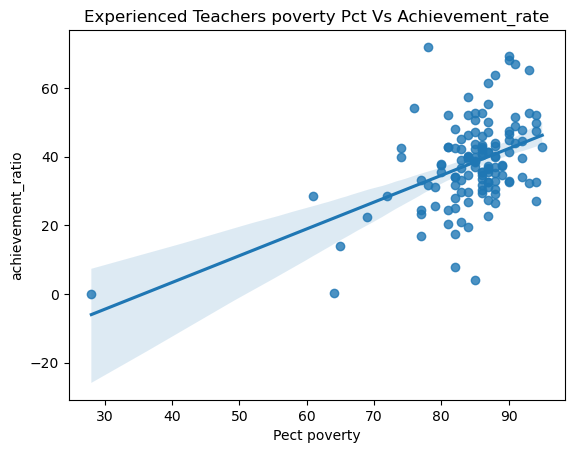

In [102]:
sns.regplot(data = district_main_poverty, x = 'Pect poverty', y = 'achievement_ratio')
plt.title("Experienced Teachers poverty Pct Vs Achievement_rate")

#### Teacher Retention

In [104]:
#import the dataset
#import data
teacher_retention_24 = pd.read_excel('../data/Education 2021_24/Teachers retention/teacher_retention-2023-24-final.xlsx', sheet_name ='Teacher Retention')
teacher_retention_23 = pd.read_excel('../data/Education 2021_24/Teachers retention/teacher_retention-2022-23.xlsx', sheet_name ='Teacher Retention')
teacher_retention_22 = pd.read_excel('../data/Education 2021_24/Teachers retention/teacher-retention-2021-2022-updated-2023-01-06.xlsx', sheet_name ='Teacher Retention')
teacher_retention_21 = pd.read_excel('../data/Education 2021_24/Teachers retention/teacher-retention-2020-2021-updated-2023-01-06.xlsx', sheet_name ='Teacher Retention')

#clean Year column
teacher_retention_24['Year'] = 2024
teacher_retention_23['Year'] = 2023
teacher_retention_22['Year'] = 2022
teacher_retention_21['Year'] = 2021

#merge the datsets
teacher_retention = pd.concat([teacher_retention_24,teacher_retention_23,teacher_retention_22,teacher_retention_21], ignore_index = True)

#data_conversion
teacher_retention['Percent Retained'] = pd.to_numeric(teacher_retention['Percent Retained'], errors = 'coerce')
teacher_retention.head()

,System Number,System Name,School Number,School Name,Percent Retained,Year
0,0,State of Tennessee,0,All Schools,85.4,2024
1,10,Anderson County,0,All Schools,76.4,2024
2,10,Anderson County,2,Anderson County High School,73.5,2024
3,10,Anderson County,3,Anderson County Career Technical Center,87.5,2024
4,10,Anderson County,4,Anderson County Innovation Academy,80.0,2024


In [105]:
#filter at distric level avg
teacher_retention_2024 = (teacher_retention[(teacher_retention['Year']==2024) & (teacher_retention['School Name']=='All Schools')]
                          .groupby(['System Number' , 'System Name'])['Percent Retained']
                          .mean()
                          .reset_index()
                         )
#set district as index
teacher_retention_2024.set_index('System Name', inplace = True)
teacher_retention_2024.head()

,System Number,Percent Retained
System Name,,
State of Tennessee,0,85.4
Anderson County,10,76.4
Clinton,11,78.0
Oak Ridge,12,92.7
Bedford County,20,82.2


In [106]:
teacher_retention_2024.drop(columns = 'System Number')

#combine with main dataset
district_main_retention = district_main_poverty.merge(teacher_retention_2024,left_index=True, right_index=True, how = 'left')
                                                      
district_main_retention.head()

,year,System Number_x,achievement_ratio,Percent Disciplined,pct_chronically_absent,Student-Educator Ratio,Percentage,Pect poverty,System Number_y,Percent Retained
District Name,,,,,,,,,,
Williamson County,2024,940.0,71.98,5.4,7.5,17.0,77.730769,78.0,940.0,81.1
Collierville,2024,795.0,69.22,2.8,10.2,16.0,80.900000,90.0,795.0,91.1
Germantown,2024,796.0,68.30,4.3,6.8,17.0,77.285714,90.0,796.0,91.3
Maryville,2024,52.0,67.11,4.0,8.0,17.0,79.375000,91.0,52.0,89.2
Arlington,2024,793.0,65.13,7.4,6.9,18.0,93.000000,93.0,793.0,88.0


Text(0.5, 0, '% retained teachers')

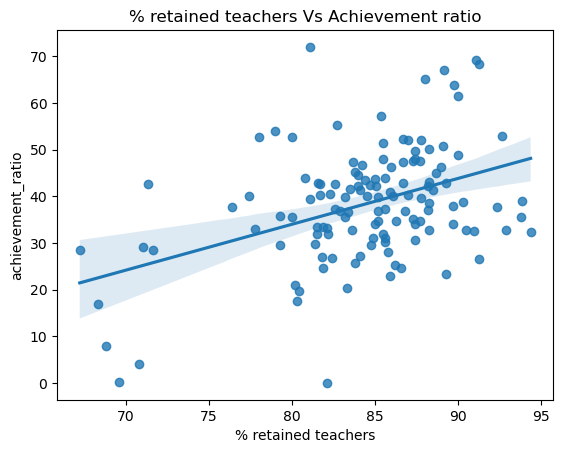

In [107]:
sns.regplot(data = district_main_retention, x = 'Percent Retained', y = 'achievement_ratio')
plt.title("% retained teachers Vs Achievement ratio")
plt.xlabel("% retained teachers")

# POPULATION DENSITY VS ACHIEVEMENT RATE

In [109]:
#import data source : https://worldpopulationreview.com/us-counties/tennessee
tn_population = pd.read_csv("../data/population density/tennessee-counties-by-population-(2025).csv")
tn_population.drop(columns = ['pop2025','pop2020','state','stateCode','growthSince2020','name','slug','areaMi','rank'], inplace = True)
tn_population.head()

,fips,county,densityMi
0,47157,Shelby County,1179.253614
1,47037,Davidson County,1435.984095
2,47093,Knox County,1006.391732
3,47065,Hamilton County,720.273063
4,47149,Rutherford County,613.794830


In [110]:
#add county name to district_main_retention
county_district = pd.read_csv("../data/Education 2021_24/data_district_to_county_crosswalk.csv")
district_main_country = district_main_retention.merge(county_district, left_on = 'System Number_x', right_on = 'District Number', how = 'left')
district_main_country.head()

,year,System Number_x,achievement_ratio,Percent Disciplined,pct_chronically_absent,Student-Educator Ratio,Percentage,Pect poverty,System Number_y,Percent Retained,Country Name,District Number
0,2024,940.0,71.98,5.4,7.5,17.0,77.730769,78.0,940.0,81.1,Williamson County,940.0
1,2024,795.0,69.22,2.8,10.2,16.0,80.900000,90.0,795.0,91.1,Shelby County,795.0
2,2024,796.0,68.30,4.3,6.8,17.0,77.285714,90.0,796.0,91.3,Shelby County,796.0
3,2024,52.0,67.11,4.0,8.0,17.0,79.375000,91.0,52.0,89.2,Blount County,52.0
4,2024,793.0,65.13,7.4,6.9,18.0,93.000000,93.0,793.0,88.0,Shelby County,793.0


In [294]:
#merge tn_population with district_main_country
district_main_population = (district_main_country.merge(tn_population, 
                                                        left_on = 'Country Name', 
                                                        right_on = 'county', 
                                                        how = 'left')
                           )
district_main_population.head()

,year,System Number_x,achievement_ratio,Percent Disciplined,pct_chronically_absent,Student-Educator Ratio,Percentage,Pect poverty,System Number_y,Percent Retained,Country Name,District Number,fips,county,densityMi
0,2024,940.0,71.98,5.4,7.5,17.0,77.730769,78.0,940.0,81.1,Williamson County,940.0,47187.0,Williamson County,466.387650
1,2024,795.0,69.22,2.8,10.2,16.0,80.900000,90.0,795.0,91.1,Shelby County,795.0,47157.0,Shelby County,1179.253614
2,2024,796.0,68.30,4.3,6.8,17.0,77.285714,90.0,796.0,91.3,Shelby County,796.0,47157.0,Shelby County,1179.253614
3,2024,52.0,67.11,4.0,8.0,17.0,79.375000,91.0,52.0,89.2,Blount County,52.0,47009.0,Blount County,258.940966
4,2024,793.0,65.13,7.4,6.9,18.0,93.000000,93.0,793.0,88.0,Shelby County,793.0,47157.0,Shelby County,1179.253614


In [264]:
# group the dataset at country level
country_avg_achievement = (
    district_main_population.groupby('Country Name')
    .agg(achievement_ratio=('achievement_ratio', 'mean'),
         densityMi=('densityMi', 'mean'))
)

# bucket the dataset in 4 groups by population density
country_avg_achievement['population_bucket'] = pd.qcut(
    country_avg_achievement['densityMi'],
    q=4,
    labels=['low', 'medium', 'high', 'very_high']
)

# group for buckets and calculate means
mean_values = country_avg_achievement.groupby('population_bucket')[['achievement_ratio', 'densityMi']].mean().reset_index()
mean_values


C:\Users\HP\AppData\Local\Temp\ipykernel_10880\2265613915.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = country_avg_achievement.groupby('population_bucket')[['achievement_ratio', 'densityMi']].mean().reset_index()


,population_bucket,achievement_ratio,densityMi
0,low,29.740870,36.812670
1,medium,35.995507,62.748330
2,high,37.648955,107.394431
3,very_high,42.733923,392.546871


Text(0.5, 0, 'population density per Mi')

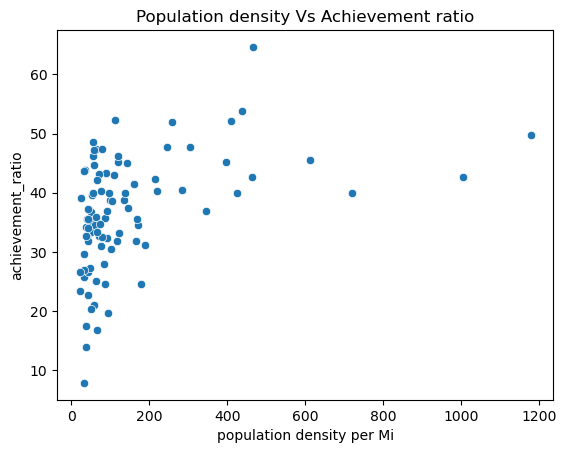

In [266]:
#plot the dataset
sns.scatterplot(data = country_avg_achievement, x = 'densityMi', y = 'achievement_ratio')
plt.title("Population density Vs Achievement ratio")
plt.xlabel("population density per Mi")

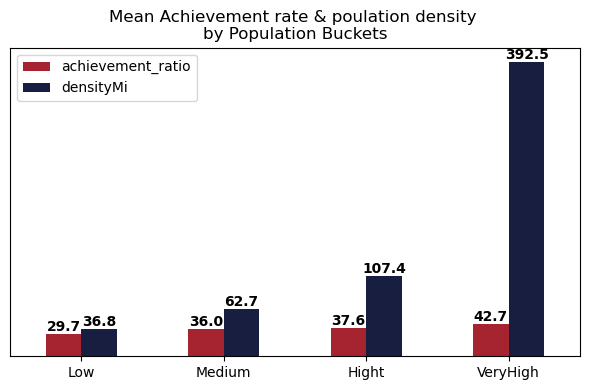

In [288]:
# Create the bar plot
ax = mean_values.plot(kind='bar', figsize=(6, 4), color=color_pallete)
ax.set_yticks([])
# Add annotations to each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.1f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold'
        )
#style
plt.xticks([0, 1, 2, 3], ['Low', 'Medium', 'Hight', 'VeryHigh'], rotation =0)
ax.set_title("Mean Achievement rate & poulation density \nby Population Buckets")
plt.tight_layout()
plt.show()

# CRIME Vs achievement rate


In [304]:
#import crime data
#from  Tennessee Bureau of Investigation (TBI)
#URL = https://crimeinsight.tbi.tn.gov/public/View/dispview.aspx?ReportId=20
crime_rate = pd.read_excel("../data/Tn_crime_rate/Crimes Rates by Jurisdiction 2023_25.xlsx", sheet_name = 'Crimes Rates edited')
crime_rate.head()

,Jurisdiction by Geography,"Crime Rate (per 1,000)",Estimated Population,Number of Crimes,county?,County Name
0,Tennessee,71.88,7149042.0,513882.0,NaN,NaN
1,East,54.21,2636659.0,142945.0,NaN,NaN
2,Anderson,53.19,79844.0,4247.0,County,Anderson County
3,7th Judicial District Crime Task Force,NaN,NaN,180.0,NaN,NaN
4,Anderson County Sheriff's Office,NaN,NaN,1208.0,NaN,NaN


In [360]:
#subset the data for country name and crime rate
crime_rate_country = (crime_rate[crime_rate['county?'].notna()][['County Name','Crime Rate (per 1,000)']]
                      .set_index('County Name')
                     )
crime_rate_country.head()

,"Crime Rate (per 1,000)"
County Name,
Anderson County,53.19
Bledsoe County,11.80
Blount County,41.27
Bradley County,62.85
Campbell County,28.08


In [354]:
#average the main dataset for counties
county_main_population = (
    district_main_population.groupby(['Country Name','fips'])
    .agg(
        achievement_ratio=('achievement_ratio', 'mean'),
        Percent_Disciplined=('Percent Disciplined', 'mean'),
        pct_chronically_absent=('pct_chronically_absent', 'mean'),
        Student_Educator_Ratio=('Student-Educator Ratio', 'mean'),
        Percentage=('Percentage', 'mean'),
        Pect_poverty=('Pect poverty', 'mean'),
        Percent_Retained=('Percent Retained', 'mean'),
        densityMi=('densityMi', 'mean'))
     
)
county_main_population.head()

,,achievement_ratio,Percent_Disciplined,pct_chronically_absent,Student_Educator_Ratio,Percentage,Pect_poverty,Percent_Retained,densityMi
Country Name,fips,,,,,,,,
Anderson County,47001.0,47.716667,8.666667,14.300000,14.666667,84.695767,86.333333,82.366667,245.827893
Bedford County,47003.0,31.810000,10.900000,16.800000,18.000000,78.714286,78.000000,82.200000,116.533755
Bledsoe County,47007.0,34.140000,14.500000,19.700000,15.000000,81.400000,82.000000,85.000000,38.162162
Blount County,47009.0,51.953333,7.266667,10.433333,16.000000,86.934524,90.666667,88.333333,258.940966
Bradley County,47011.0,36.870000,8.550000,20.850000,16.500000,87.555556,86.500000,84.750000,345.468085


In [368]:
#combine crime rate data with main dataframe
county_main_crime = county_main_population.merge(crime_rate_country,
                                                 left_on = 'Country Name', 
                                                 right_on = 'County Name',
                                                 how = 'left')
county_main_crime.head()

,achievement_ratio,Percent_Disciplined,pct_chronically_absent,Student_Educator_Ratio,Percentage,Pect_poverty,Percent_Retained,densityMi,"Crime Rate (per 1,000)"
0,47.716667,8.666667,14.300000,14.666667,84.695767,86.333333,82.366667,245.827893,53.19
1,31.810000,10.900000,16.800000,18.000000,78.714286,78.000000,82.200000,116.533755,52.68
2,34.140000,14.500000,19.700000,15.000000,81.400000,82.000000,85.000000,38.162162,11.80
3,51.953333,7.266667,10.433333,16.000000,86.934524,90.666667,88.333333,258.940966,41.27
4,36.870000,8.550000,20.850000,16.500000,87.555556,86.500000,84.750000,345.468085,62.85


<Axes: xlabel='Crime Rate (per 1,000)', ylabel='achievement_ratio'>

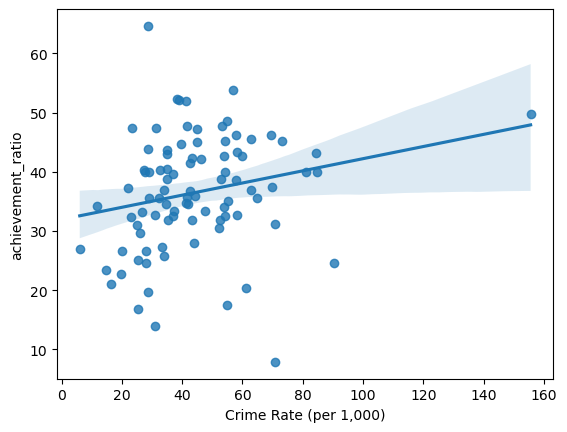

In [372]:
sns.regplot(data = county_main_crime,  x = 'Crime Rate (per 1,000)', y = 'achievement_ratio')